# CONFRONTO TRA INSERTION-SORT E COUNTING-SORT
> *Autore: Ivan Necerini*
>
> *Matricola: 7049380*
>
> *Università degli studi di Firenze*
>
> *Laboratorio di Algoritmi, Esercizio B*
>
> *Docente: Simone Marinai*

# Indice
- [Introduzione](#Introduzione)
---

- [Cenni teorici](#Cenni-teorici)
  - [Algoritmi di ordinamento](#Algoritmi-di-ordinamento)
  - [Insertion sort](#Insertion-sort)
      - [Complessità](#Complessità)
      - [Correttezza](#Correttezza)
      - [Stabilità](#Stabilità)
      - [Esempi](#Esempi)
  - [Counting sort](#Counting-sort)
      - [Complessità:](#Complessità:)
      - [Correttezza:](#Correttezza:)
      - [Stabilità:](#Stabilità:)
---

- [Descrizione dei test](#Descrizione-dei-test)
    - [Generazione dei dati per l'esecuzione dei test](#Generazione-dei-dati-per-l'esecuzione-dei-test)
    - [Esecuzione dei test](#Esecuzione-dei-test)
---

- [Generazione delle tabelle dei tempi di esecuzione](#Generazione-delle-tabelle-dei-tempi-di-esecuzione)
---

- [Generazione dei grafici](#Generazione-dei-grafici)
---

- [Osservazioni finali](#Osservazioni-finali)
    - [Caso peggiore: valori ordinati inversamente ](#Caso-peggiore:-valori-ordinati-inversamente)
    - [Caso medio: valori casuali)](#Caso-medio:-valori-casuali)
    - [Caso migliore: valori già ordinati correttamente](#Caso-migliore:-valori-già-ordinati-correttamente))
    - [Osservazioni su insertion sort](#Osservazioni-su-insertion-sort)
    - [Osservazioni sul counting sort](#Osservazioni-sul-counting-sort)
---

- [Bibliografia](#Bibliografia)


# Introduzione
Il presente notebook Jupyter si focalizza sul confronto delle prestazioni di due algoritmi di ordinamento: Insertion sort e Counting sort. L'obiettivo è comprendere le differenze di efficienza tra questi due approcci e valutare le situazioni in cui ciascun algoritmo si dimostra più vantaggioso.

Per condurre i test e ottenere una migliore comprensione dei due algoritmi di ordinamento, sono stati impiegati i seguenti moduli Python:

- `numpy` $\rightarrow$ utilizzato per generare array con valori casuali utilizzando la funzione `numpy.random.randint()`.
- `matplotlib` $\rightarrow$ utilizzato per creare grafici e tabelle al fine di analizzare visivamente le prestazioni dei due algoritmi. Le funzioni `matplotlib.pyplot.plot()` e `matplotlib.pyplot.table()` sono state impiegate a tal scopo.

Eseguire il codice sottostante per installarli:

In [3]:
!pip install numpy --user --quiet
!pip install matplotlib --user --quiet

# Cenni teorici

## Algoritmi di ordinamento
L'ordinamento è un problema fondamentale nell'ambito dell'informatica e dell'analisi degli algoritmi. Consiste nel riorganizzare un insieme di elementi in una sequenza ordinata secondo un determinato criterio, che può essere crescente o decrescente. L'obiettivo principale dell'ordinamento è ottenere una rappresentazione ordinata dei dati, facilitando le operazioni di ricerca, confronto e analisi.

Il problema dell'ordinamento riveste un'importanza cruciale in molti contesti applicativi, come ad esempio l'elaborazione di database, la gestione di grandi quantità di dati, la risoluzione di problemi di ottimizzazione e molto altro ancora. Un algoritmo di ordinamento efficiente può contribuire significativamente a migliorare le prestazioni di altre operazioni e algoritmi che dipendono dalla corretta disposizione degli elementi.

Esistono numerosi algoritmi di ordinamento, ognuno dei quali presenta differenti approcci e strategie per organizzare gli elementi. Questi algoritmi possono differire notevolmente per complessità computazionale, velocità di esecuzione e adattabilità a specifici tipi di dati o situazioni. La scelta dell'algoritmo di ordinamento più appropriato dipende dal contesto e dai requisiti specifici dell'applicazione.

## Insertion sort
L'Insertion Sort è un semplice algoritmo di ordinamento che si basa sul principio dell'inserimento progressivo degli elementi all'interno di una lista. È un algoritmo intuitivo e può essere applicato efficacemente ad array di dimensioni ridotte o a situazioni in cui l'array è già parzialmente ordinato.

Il funzionamento dell'Insertion Sort è basato su un approccio incrementale. L'algoritmo analizza gli elementi dell'array uno per uno e, ad ogni passo, inserisce l'elemento corrente nella sua giusta posizione all'interno della porzione già ordinata dell'array. Inizialmente, si considera il primo elemento dell'array come una sequenza ordinata di un solo elemento. Successivamente, si prende l'elemento successivo e lo si inserisce nella posizione corretta nella sequenza ordinata finora, spostando gli elementi più grandi di quello corrente verso destra.

Per comprendere meglio il funzionamento dell'Insertion Sort, si può immaginare di organizzare una mano di carte in ordine crescente. Si inizia con una carta nella mano (rappresentando il primo elemento dell'array), quindi si prende una nuova carta (il secondo elemento dell'array) e la si inserisce nella posizione corretta nella mano, spostando le carte più grandi verso destra. Si ripete questo processo per ogni carta successiva fino a quando tutte le carte sono state inserite nella posizione corretta. 

In qualsiasi momento, le carte che teniamo nella mano sinistra sono ordinate; originariamente queste carte erano le prime
della pila di carte che erano sul tavolo. Questa frase, a livello di codice (come si vede successivamente), si traduce nel fatto che all'i-esima iterazione, i primi i−1 elementi sono già ordinati tra di loro.

|<img src="https://media.geeksforgeeks.org/wp-content/uploads/insertionsort.png" alt="Esempio di applicazione di insertion sort" style="width: 50%; height: auto;">|
|:--:|
| *Figura 1: esempio di applicazione di insertion sort* |
Fonte: [Geeksforgeeks](https://media.geeksforgeeks.org/wp-content/uploads/insertionsort.png)

Come si vede dall'implementazione che segue, i numeri di input vengono ordinati sul posto: essi sono risistemati all’interno dell’array A, con al più un numero costante di essi memorizzati all’esterno dell’array in qualsiasi istante.




In [4]:
# Implementazione di insertion sort
def insertionSort(A: list):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        # Muovo gli elementi di A[0...i-1], che sono maggiori della chiave,
        #una posizione dopo rispetto a quella dove si trovano
        while j >= 0 and A[j]>key:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key

### Complessità
Caso peggiore (array è ordinato inversamente): l'insertion sort richiede di spostare ogni elemento verso destra di una posizione per ogni elemento precedente. Questo comporta una complessità di tempo quadratica, con una notazione di $O(n^2)$, dove n rappresenta la dimensione dell'array. Quindi, nel caso peggiore, l'Insertion Sort non è efficiente per grandi quantità di dati.

Caso medio: Nel caso medio, l'Insertion Sort si comporta meglio rispetto al caso peggiore, ma non raggiunge la complessità del caso migliore. La complessità media dell'Insertion Sort è ancora $O(n^2)$ , ma può essere leggermente migliorata in situazioni in cui l'array è parzialmente ordinato o presenta un certo grado di casualità nella disposizione degli elementi.

Caso migliore (array ordinato): l'insertion sort richiede solo una singola scansione dell'array senza dover effettuare alcuno spostamento. In questo caso, l'algoritmo ha una complessità di $\Omega(n)$, poiché ogni elemento viene confrontato solo con gli elementi precedenti.


| Caso peggiore | Caso medio | Caso migliore |
|:--:|:--:|:--:|
| $O(n^2)$ |$O(n^2)$|$\Omega(n)$|


Nonostante sia una soluzione valida per quantità di dati limitate, le caratteristiche dell'Insertion Sort lo rendono generalmente inefficiente, limitando la sua efficacia su grandi quantità di dati da ordinare.

### Correttezza
L'insertion sort è corretto nel senso che garantisce che l'array di input sarà ordinato correttamente dopo l'esecuzione dell'algoritmo. L'idea di base dell'insertion sort è quella di mantenere una sottosequenza di elementi ordinati mentre si attraversa l'array, inserendo ciascun elemento nella posizione corretta all'interno della sottosequenza. Questo processo di inserimento ripetuto garantisce che l'intero array sarà alla fine ordinato correttamente.
La sua correttezza può essere dimostrata tramite una invariante di ciclo, dato che l'implentazione mostrata prima è in versione iterativa.

### Stabilità
L'Insertion Sort è un algoritmo di ordinamento stabile, il che significa che preserva l'ordine relativo degli elementi con chiavi uguali. Ciò significa che se due elementi hanno la stessa chiave e sono in posizioni diverse nell'array di input, allora dopo l'applicazione dell'Insertion Sort, questi due elementi manterranno lo stesso ordine relativo nella sequenza ordinata. 

Ad esempio, se si sta ordinando un elenco di studenti per punteggio e due studenti hanno lo stesso punteggio, l'Insertion Sort garantirà che i due studenti mantengano il loro ordine originale nella sequenza ordinata, preservando così la giustizia nella valutazione.

### Esempi
|![Esempio animazione insertion sort](https://upload.wikimedia.org/wikipedia/commons/8/82/AnimazioneInsertionSort.gif "Esempio animazione insertion sort")|
|:--:|
| *Figura 2: esempio animazione insertion sort* |
Fonte: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/8/82/AnimazioneInsertionSort.gif)


|![Esempio grafico Insertion Sort](https://upload.wikimedia.org/wikipedia/commons/2/25/Insertion_sort_animation.gif "Esempio animazione insertion sort")|
|:--:|
| *Figura 3: esempio grafico Insertion Sort* |
Fonte: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/2/25/Insertion_sort_animation.gif)



## Counting sort
Il counting sort è un algoritmo di ordinamento non comparativo. A differenza di altri algoritmi di ordinamento, il counting sort sfrutta le informazioni sul range dei valori dell'input per ottenere una complessità lineare.

Il funzionamento del counting sort può essere suddiviso in tre fasi:

1. Conta le occorrenze: In questa fase, viene creato un array di conteggio con dimensioni pari all'intervallo massimo dei valori presenti nell'input. Si scandisce l'input e si incrementa il contatore corrispondente al valore dell'elemento. Alla fine di questa fase, l'array di conteggio conterrà il numero di occorrenze per ciascun valore presente nell'input.

2. Calcola le posizioni: Utilizzando l'array di conteggio, viene calcolato un array ausiliario di posizioni. Questo array indica la posizione in cui ogni valore deve essere posizionato nell'output finale. Viene calcolato sommando i valori precedenti nell'array di conteggio. In altre parole, l'elemento i-esimo nell'array ausiliario di posizioni indica la posizione finale dell'ultimo elemento con valore i nell'output.

3. Costruisci l'output: Durante questa fase, si scorre nuovamente l'input. Per ogni elemento, si determina la sua posizione finale utilizzando l'array ausiliario di posizioni e si inserisce l'elemento in quella posizione nell'output. Successivamente, si decrementa il valore corrispondente nell'array di conteggio per tener traccia delle occorrenze rimanenti.

Tuttavia, il Counting Sort presenta alcune limitazioni. Richiede un intervallo limitato dei valori di input e può richiedere una quantità significativa di memoria, in particolare quando l'intervallo è ampio. Pertanto, è efficace in situazioni specifiche in cui queste limitazioni non sono un problema, come l'ordinamento di numeri interi non negativi in un range ristretto.

E' possibile capire a pieno il funzionamento di questo algoritmo con un'animazione (cliccare per aprire il video):

<br>

<a href="https://www.youtube.com/watch?v=lKMkuZO4wlY" target="_blank">
  <img src="https://img.youtube.com/vi/lKMkuZO4wlY/0.jpg" alt="Anteprima del video" style="width: 480px; height: 270px; border-radius: 10px;">
</a>

<br>

Segue una delle sue possibili implementazioni (supponendo che operi su un insieme di interi non negativi):

In [5]:
# Implementazione del counting sort
def countingSort(A: list):
    # Trova il valore massimo nell'array di input per determinare la dimensione dell'array di conteggio
    maxValue = max(A)
    
    # Crea un array di conteggio con dimensioni pari al valore massimo + 1 (ogni valore possibile)
    counts = [0] * (maxValue + 1)   

    # Conta il numero di occorrenze di ciascun elemento nell'array
    for num in A:
        counts[num] += 1

    # Conta il numero di elementi minori o uguali a i
    # Questo array indica la posizione in cui ogni valore deve essere posizionato nell'output finale
    for i in range(1, maxValue + 1):
        counts[i] += counts[i - 1]

    # Crea l'array ordinato B
    B = [0] * len(A)
    for num in A:
        B[counts[num] - 1] = num
        counts[num] -= 1
    return B

### Complessità:
La complessità del Counting Sort dipende sia dalla dimensione dell'array da ordinare (n) che dalla quantità di valori che è possibile inserire nell'array da ordinare (k) (valore massimo, dunque valori da 1 a k).

Il costo dell'algoritmo è $O(n + k)$.

La complessità nel caso peggiore è lineare rispetto alla somma di n e k. Ciò significa che il tempo e lo spazio richiesti per eseguire l'algoritmo crescono in modo lineare all'aumentare di entrambi i valori.

La complessità nel caso peggiore si verifica quando i valori nell'array sono distribuiti in modo uniforme su un ampio intervallo. In questo caso, il tempo di esecuzione dipenderà principalmente dalla dimensione dell'array (n) e dal valore massimo (k).

È importante notare che se k è relativamente piccolo rispetto a n, l'algoritmo può essere molto efficiente. Tuttavia, se k è comparabile o addirittura maggiore di n, l'algoritmo diventa meno efficiente.

### Correttezza:
Il Counting Sort è un algoritmo corretto e garantisce che l'array di input sarà ordinato correttamente. Poiché il Counting Sort utilizza informazioni sull'ordine dei valori e non confronta direttamente gli elementi, l'ordinamento è garantito essere corretto. La sua correttezza può essere dimostrata tramite una invariante di ciclo, dato che l'implentazione mostrata prima è in versione iterativa.

### Stabilità:
Il Counting Sort è un algoritmo di ordinamento stabile. Quando ci sono elementi con la stessa chiave, il Counting Sort assegna loro posizioni nell'array ordinato in base all'ordine in cui compaiono nell'array di input. Ciò significa che due elementi con la stessa chiave manterranno il loro ordine relativo nella sequenza ordinata, garantendo così la stabilità.

La stabilità di counting sort è importante. Una delle motivazioni è che counting sort viene spesso utilizzato come subroutine di radix sort.

# Descrizione dei test

Per valutare le prestazioni degli algoritmi di ordinamento, è necessario generare una lista di valori interi di dimensione n e misurare il tempo di esecuzione di ambedue gli algoritmi.

Per ottenere una valutazione accurata dell'Insertion Sort, verranno creati dati per il caso migliore (dati già ordinati) e il caso peggiore (dati ordinati inversamente). Invece, per il counting sort, ciò non è necessario, in quanto questi particolari dati non influiscono sulle sue prestazioni, poiché la sua complessità rimane costante in tutti i casi. I test di ordinamento verranno eseguiti su un insieme di n valori, con n che varia da 1 a 10000.

Per ciascun test, verranno eseguite più prove, generando input diversi, e verrà calcolato il valore medio di ogni gruppo di prove. In questo modo, saranno ottenute informazioni significative sulle prestazioni e sul comportamento degli algoritmi di ordinamento confrontati.

## Generazione dei dati per l'esecuzione dei test
Di seguito sono presentate alcune funzioni per generare array di valori:

La funzione `randomArray(n)` accetta un intero n come parametro e genera un array di n valori casuali compresi tra 0 e maxValue.

Le funzioni `sortedArray(n)` e `reversedArray(n)` generano invece array di n elementi, ordinati in modo crescente e decrescente rispettivamente.

In [6]:
import numpy as np

# Valore massimo che può essere inserito nell'array
maxValue = 200  

# Array di numeri random
def randomArray(n):
    # converte l'array numpy in una lista utilizzando il metodo .tolist()
    return np.random.randint(0, maxValue + 1, n).tolist()

# Array ordinato (crescente)
def sortedArray(n):
    # da 0 a n-1
    return list(range(n)) 

# Array ordinato inversamente (decrescente)
def reversedArray(n):
    # da n-1 a 0
    return list(range(n-1, -1, -1)) 

## Esecuzione dei test
Il parametro "n" rappresenta il numero totale di iterazioni nell'esecuzione dello script sottostante. Ad ogni iterazione, viene generato un array composto da "i" elementi, che successivamente verrà ordinato utilizzando due algoritmi che saranno confrontati.
    
La misurazione del tempo di esecuzione dei due algoritmi `insertionSort(A: list)` e `countingSort(A: list)` avviene tramite l'utilizzo del modulo "timeit" e della sua funzione "timeit.timeit()". Per ottenere una misura più precisa, l'ordinamento viene ripetuto un numero di volte pari a "nrTestEachIteration" e successivamente viene calcolata la media dei tempi ottenuti.

È importante sottolineare che viene eseguito prima l'algoritmo counting sort sull'array, seguito dall'insertion sort. Questo perché il counting sort restituisce un nuovo array con gli elementi ordinati, mantenendo invariato l'array originale, mentre l'insertion sort effettua l'ordinamento direttamente sull'array di partenza (sul posto). Invertendo l'ordine delle chiamate, l'insertion sort ordinerà l'array generato, di conseguenza il counting sort riceverà sempre un array già ordinato.

In [ ]:
import timeit

n = 10000
step = 400
nrTestEachIteration = 400

insertionSortWorst = []
countingSortWorst = []

insertionSortAverage = []
countingSortAverage = []

insertionSortBest = []
countingSortBest = []


def measureTime(function, args):
    # Restituisce la media del tempo di esecuzione (in millisecondi) della funzione fornita, eseguita per nrTestEachIteration volte"""
     return timeit.timeit(stmt=lambda: function(args), number=nrTestEachIteration) / nrTestEachIteration * 1000

# Caso peggiore, elementi ordinati inversamente
for i in range(1, n, step):
    arrayTest = reversedArray(i)
    # Test sul counting sort
    countingSortWorst.append(measureTime(countingSort, arrayTest))   
    # Test sull'insertion sort
    insertionSortWorst.append(measureTime(insertionSort, arrayTest))  
    
# Caso medio, elementi casuali
for i in range(1, n, step):
    arrayTest = randomArray(i)
    # Test sul counting sort
    countingSortAverage.append(measureTime(countingSort, arrayTest)) 
    # Test sull'insertion sort
    insertionSortAverage.append(measureTime(insertionSort, arrayTest)) 
      
    
# Caso migliore, elementi gia' ordinati
for i in range(1, n, step):
    arrayTest = sortedArray(i)
    # Test sul counting sort
    countingSortBest.append(measureTime(countingSort, arrayTest))   
    # Test sull'insertion sort
    insertionSortBest.append(measureTime(insertionSort, arrayTest)) 
    
print("END, DEBUG")

# Generazione delle tabelle dei tempi di esecuzione
Di seguito sono riportate le tabelle che mostrano i tempi di esecuzione dei due algoritmi nei tre casi considerati, al crescere della quantità dei valori da ordinare.

Le tabelle sono state create utilizzando la libreria `numpy` e il metodo `numpy.pyplot.table`

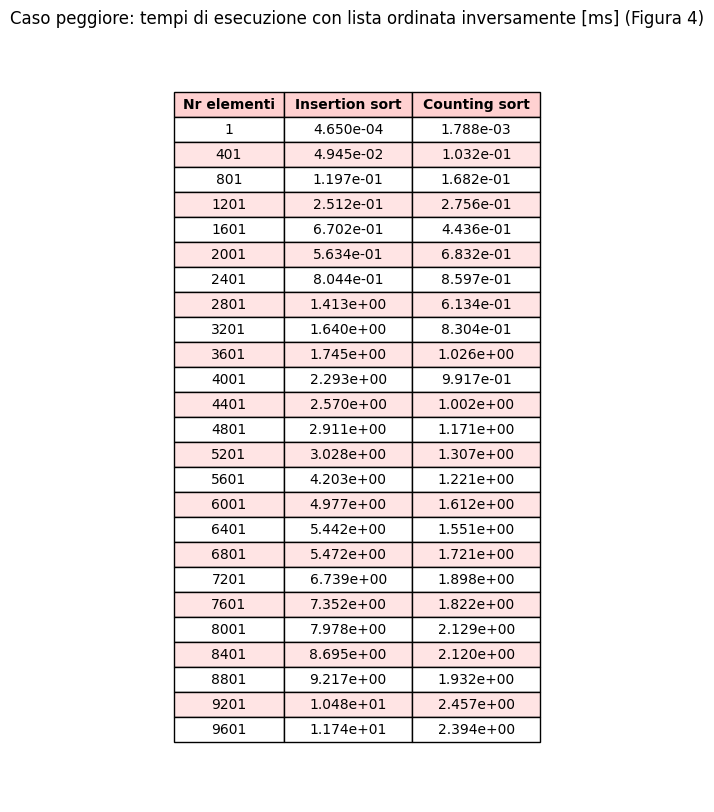

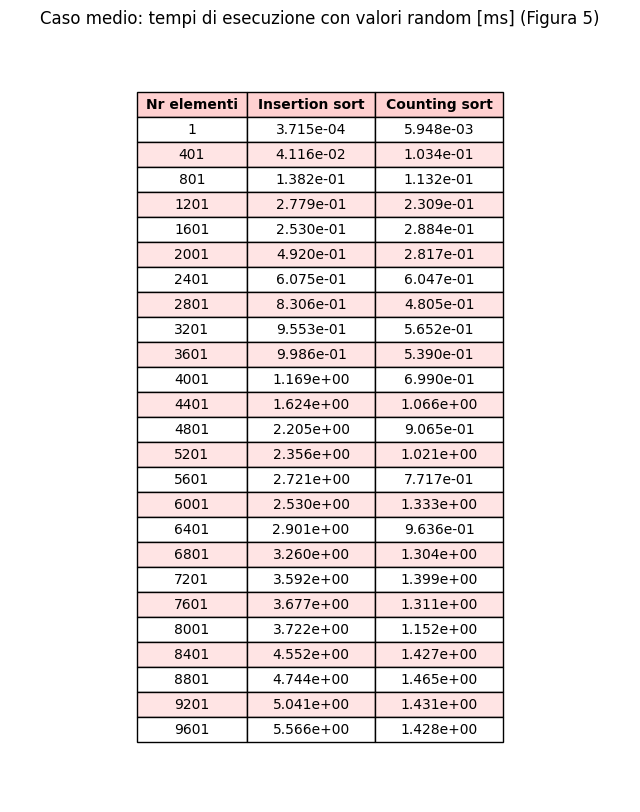

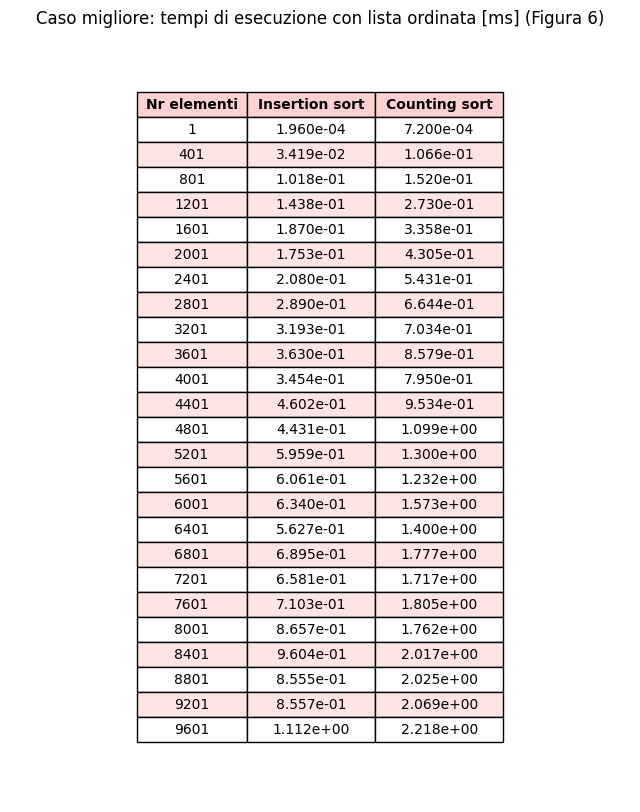

In [80]:
import matplotlib.pyplot as plt

# Creazione delle liste di dati
worstData = [
    [i for i in range(1, n, step)],
    ["{:.3e}".format(val) for val in insertionSortWorst],
    ["{:.3e}".format(val) for val in countingSortWorst]
]

averageData = [
    [i for i in range(1, n, step)],
    ["{:.3e}".format(val) for val in insertionSortAverage],
    ["{:.3e}".format(val) for val in countingSortAverage]
]

bestData = [
    [i for i in range(1, n, step)],
    ["{:.3e}".format(val) for val in insertionSortBest],
    ["{:.3e}".format(val) for val in countingSortBest]
]

def traceTables(columns: list, headers: tuple, title: str):
    fig, ax = plt.subplots(figsize=(8, 10))
    plt.title(title)

    # Unisci le liste come colonne
    data = np.stack(tuple(columns), axis=1) 

    # Stile tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(columns))))
    table.scale(1, 1.5)

    # Colorazione headers e le righe pari
    cell_colors = {
        cell: ("#ffd1d1", {"weight": "bold"})
        if table[cell].get_text().get_text() in headers
        else ("#ffe4e4", {})
        for cell in table._cells
        if cell[0] % 2 == 0
    }
    for cell, (color, text_props) in cell_colors.items():
        # set the color of the cell
        table[cell].set_facecolor(color)
        # set the text properties of the cell
        table[cell].set_text_props(**text_props)
        # ** used to expand the dictionary
    plt.show()

traceTables(
    worstData,
    ("Nr elementi", "Insertion sort", "Counting sort"),
    "Caso peggiore: tempi di esecuzione con lista ordinata inversamente [ms] (Figura 4)"
)
    
traceTables(
    averageData,
    ("Nr elementi", "Insertion sort", "Counting sort"),
    "Caso medio: tempi di esecuzione con valori random [ms] (Figura 5)"
)

traceTables(
    bestData,
    ("Nr elementi", "Insertion sort", "Counting sort"),
    "Caso migliore: tempi di esecuzione con lista ordinata [ms] (Figura 6)"
)




# Generazione dei grafici
La generazione dei grafici è stata realizzata utilizzando la libreria matplotlib. I tre set di grafici presentati confrontano i tempi di esecuzione dei due algoritmi in base alla lunghezza dell'array.

I valori rappresentati nei grafici si riferiscono, rispettivamente, al caso peggiore (valori ordinati inversamente), al caso medio (valori casuali) e al caso migliore (valori ordinati in modo corretto).

In [76]:
def approximate(plot, x, y, degree, label):
    # Calcola i coefficienti dell'approssimazione polinomiale
    coefficients = np.polyfit(x, y, degree)
    # Crea una nuova serie di punti x equidistanti
    newX = np.linspace(1, n, n)
    # Calcola i valori approssimati corrispondenti ai nuovi punti x
    newY = np.polyval(coefficients, newX)
    # Disegna la curva approssimata
    plot.plot(newX, newY, '--', label=label)

def tracePlots(left_data, right_data, plot_title: str = None, smooth = False):
    x = np.linspace(1, n, len(left_data))
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Insertion sort, grafico a sinistra
    left.plot(x, left_data, color='red')
    left.set_title('Insertion Sort')
    left.set_xlabel('Dimensione della lista [n]')
    left.set_ylabel('Tempo di esecuzione [ms]')
    
    # Aggiungi l'approssimazione polinomiale al grafico Insertion Sort
    approximate(left, x, left_data, 2, label='Interpolazione polinomiale') # Aggiungo l'approssimazione polinomiale
    left.legend()


    # Counting sort, grafico a destra
    right.plot(x, right_data, color='purple')
    right.set_title('Counting Sort')
    right.set_xlabel('Dimensione della lista [n]')
    right.set_ylabel('Tempo di esecuzione [ms]')
     
    # Aggiungi l'approssimazione polinomiale al grafico Counting Sort
    approximate(right, x, right_data, 1, label='Retta di regressione') # Aggiungo l'approssimazione polinomiale
    right.legend()
    
    if plot_title:
        fig.suptitle(plot_title, fontsize=16)

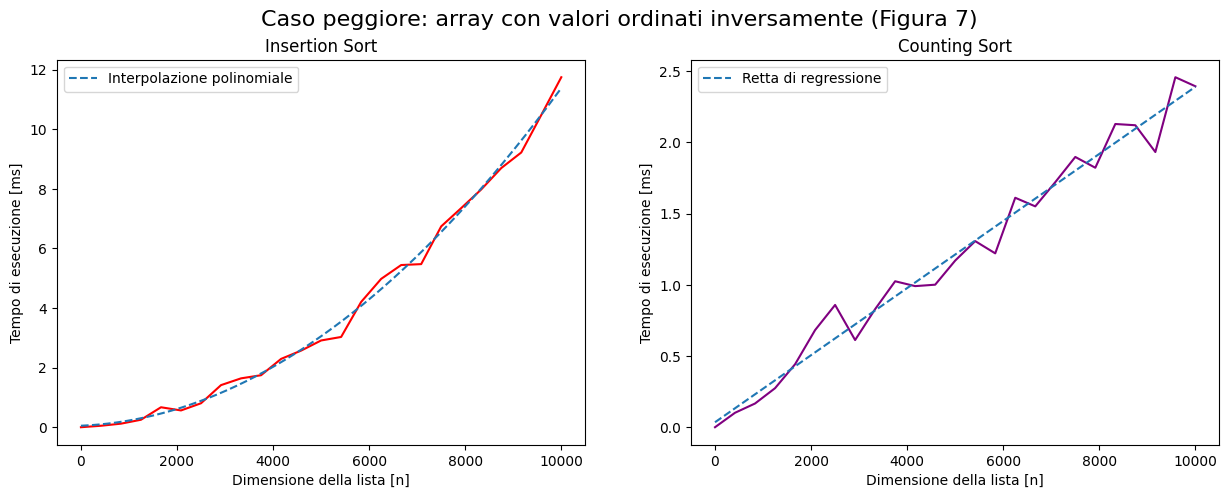

In [77]:
tracePlots(insertionSortWorst, countingSortWorst, "Caso peggiore: array con valori ordinati inversamente (Figura 7)")

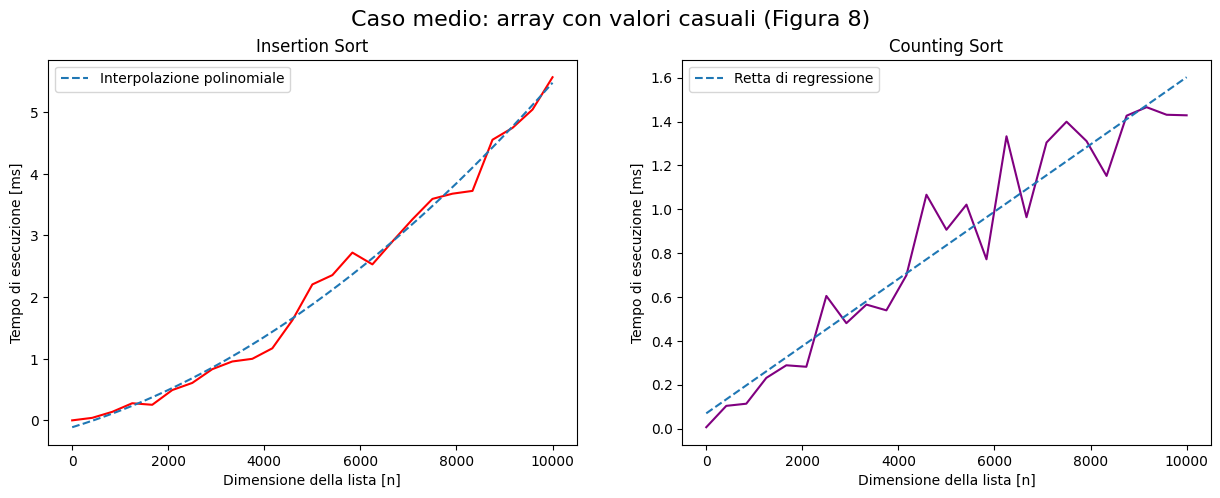

In [78]:
tracePlots(insertionSortAverage, countingSortAverage, "Caso medio: array con valori casuali (Figura 8)")

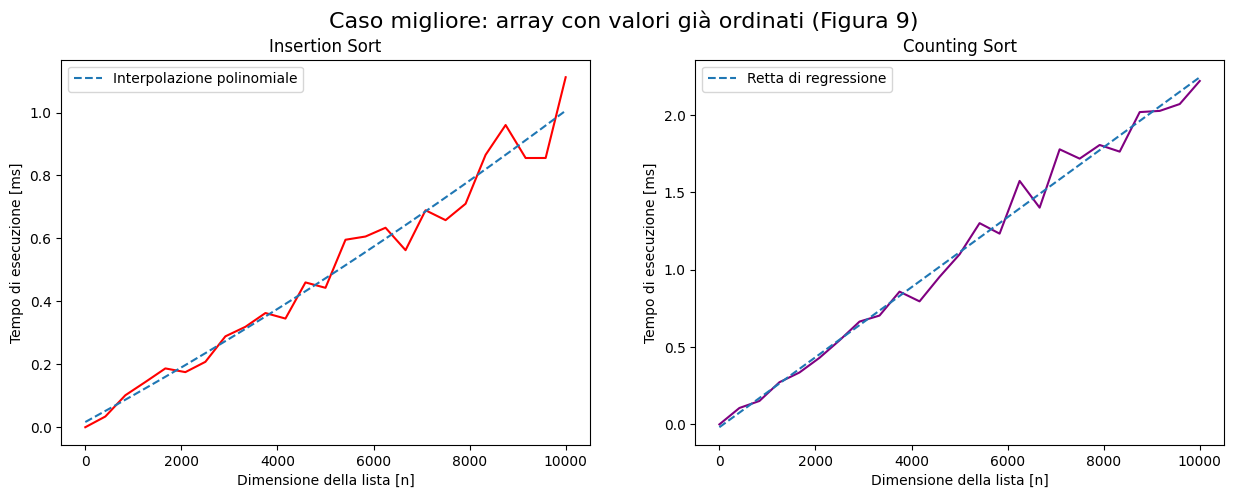

In [79]:
tracePlots(insertionSortBest, countingSortBest, "Caso migliore: array con valori già ordinati (Figura 9)")

# Osservazioni finali
Dai grafici appena generati si nota in modo molto efficace gli svantaggi / vantaggi dell'uso di un algoritmo rispetto a un altro e il comportamento dei due algoritmi al variare della dimensione dei dati da ordinare e a come essi sono distribuiti.

## Caso peggiore: valori ordinati inversamente 

Il caso peggiore dell'Insertion sort è quando i dati sono ordinati inversamente.
La sua complessità in questo caso è quadratica, come confermato dal grafico a sinistra in figura 7, in cui si confrontano i tempi di esecuzione dell'Insertion sort (rosso) e l'interpolazione tramite un polinomio di secondo grado (parabola).
Tramite l'asse y nei grafici in Figura 8 e Figura 7, e le tabelle in figura 4 e figura 5, è possibile osservare inoltre che i tempi di esecuzione rispetto al caso medio sono peggiori, a parità della quantità dei valori da ordinare.

Il Counting Sort invece continua ad avere complessità lineare, con tempi di esecuzione molto simili al caso migliore.


## Caso medio: valori casuali

Nel caso di ordinamento di una lista composta da valori random, il grafico delle prestazioni dell'Insertion Sort mostra chiaramente un andamento simile a $n^2$ (parabola rappresentata in arancione in Fig. 5), come previsto dallo studio della complessità. Il Counting Sort ha invece un comportamento lineare.

Questo ha impatto anche sui tempi di esecuzione, come è possibile vedere nella tabella in Fig. 8 riportata in precedenza. Al crescere dei dati, le prestazioni del Counting Sort sono decisamente migliori rispetto a quelle dell'Insertion Sort.

Si nota però che quando i dati da ordinare sono pochi l'Insertion Sort ha performance migliori rispetto al Counting Sort.

## Caso migliore: valori già ordinati correttamente

Il caso migliore dell'Insertion Sort è quando i dati sono già ordinati.
In questo caso, la sua complessità è lineare, come è possibile osservare dal grafico a sinistra in Fig. 6.
Questo conferma le ipotesi teoriche fatte all'inizio, in cui è stato affermato che la complessità nel caso migliore è di $\Omega(n)$. L'interpolazione polinomiale tramite un polinomio di grado 2, rappresentata in arancione in Fig. 6, mostra chiaramente che l'andamento della curva è lineare, e non quadratico.

Il Counting Sort invece continua ad avere un andamento lineare, come previsto dai cenni teorici.

Inoltre, osservando la tabella in Fig. 9, si vede che i tempi di esecuzione dell'Insertion Sort rispetto a quelli del Counting Sort sono inferiori, nonostante entrambi abbiano un comportamento lineare. Questo è dovuto al fatto che l'Insertion Sort è un algoritmo molto più semplice del Counting Sort. Infatti l'Insertion Sort ha un solo ciclo esterno, mentre il Counting Sort ha più cicli esterni e quindi deve eseguire più operazioni con costo lineare.

## Osservazioni su insertion sort

La complessità teorica dell'Insertion Sort rispetta le misurazioni effettuate nella pratica.
Nel caso migliore la sua complessità è effettivamente lineare, mentre nel caso medio e nel caso peggiore la complessità diventa quadratica.

## Osservazioni sul counting sort

Come previsto, la complessità del Counting Sort rimane lineare a prescindere dai dati che riceve in ingresso.

È infine possibile osservare che quando l'array è già ordinato (in modo crescente o decrescente), le prestazioni del Counting Sort sono peggiori rispetto a quando i valori sono random.
È possibile osservare questo fenomeno sia tramite l'asse verticale dei grafici (Fig. 5, Fig. 6, Fig. 7) che tramite i valori dei tempi di esecuzione riportati in tabella (Fig. 8, Fig. 9, Fig. 10).

Questo è dovuto al fatto che quando i dati sono ordinati, questi vanno da $1$ a $n$, (e viceversa) e non ci sono valori ripetuti, mentre nel medio i valori vanno da $1$ a `max_value`, quindi quando la lunghezza della lista è maggiore di `max_value` sicuramente avremo valori ripetuti, e questo migliora la performance del Counting Sort, in quanto la sua complessità è $O(n+k)$ e dipende anche dal range dei dati all'interno della lista.

# Bibliografia
Fig.1, Fig.2, Fig.3, Fig.4: [Insertion Sort - Wikipedia](https://en.wikipedia.org/wiki/Insertion_sort)